In [1]:
import gym
import numpy as np

import time

In [2]:
import sys
import os

sys.path.append(os.path.abspath('../'))

del sys, os

In [3]:
import matplotlib.pyplot as plt

In [4]:
# LaTeX rendering in graphs
from distutils.spawn import find_executable
if find_executable('latex'):
    plt.rc('text', usetex=True)

plt.rc('font', family='serif')

# High resolution graphs
%config InlineBackend.figure_format = 'retina'

In [5]:
import torch

In [6]:
%reload_ext autoreload
%autoreload 2

In [7]:
import models.rnn as rnns
import models.mlp as mlps
import control.agents as agents
import control.environments as env

In [8]:
from utils.notifications import Slack
import utils.eligibility_optim as eligibility

In [9]:
import copy

# Setup

In [10]:
class Linear(torch.nn.Linear):
    
    def __init__(self):
        
        super(Linear, self).__init__(500, 6, bias=False)
        
    def reset(self):
        pass

In [11]:
model = Linear()

In [12]:
model.weight

Parameter containing:
tensor([[ 0.0418, -0.0166,  0.0216,  ...,  0.0345, -0.0244,  0.0211],
        [-0.0144,  0.0068, -0.0395,  ..., -0.0405, -0.0355,  0.0288],
        [-0.0260, -0.0294, -0.0219,  ..., -0.0148, -0.0098, -0.0432],
        [-0.0100, -0.0258, -0.0048,  ...,  0.0375,  0.0338, -0.0394],
        [ 0.0252,  0.0067,  0.0249,  ..., -0.0086, -0.0240, -0.0292],
        [ 0.0383, -0.0391, -0.0151,  ..., -0.0219, -0.0085,  0.0180]],
       requires_grad=True)

In [13]:
torch.nn.init.zeros_(model.weight)

Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True)

In [14]:
optimiser = torch.optim.SGD(model.parameters(), lr=.45)

In [15]:
agent = agents.DQNAgent(model, optimiser, gamma=.9, temperature=1, algorithm='expsarsa', n_actions=6)

In [16]:
environment = env.Environment(
    environment=gym.make('Taxi-v2'), 
    agent=agent, 
    verbose=True,
    max_steps=1000,
    capacity=5000,
    representation_method='one_hot_encoding',
    use_double_learning=False,
    use_replay_memory=False
)

# One update at a time

## SGD

In [17]:
optimiser = torch.optim.SGD(model.parameters(), lr=.45)

### Sarsa

In [22]:
torch.nn.init.zeros_(model.weight);

In [23]:
environment.agent = agents.DQNAgent(model, optimiser, gamma=.9, 
                                    temperature=1, algorithm='sarsa', n_actions=6, use_double_learning=False)

In [24]:
returns, steps = np.array([environment.training_episode() for _ in range(400)]).T

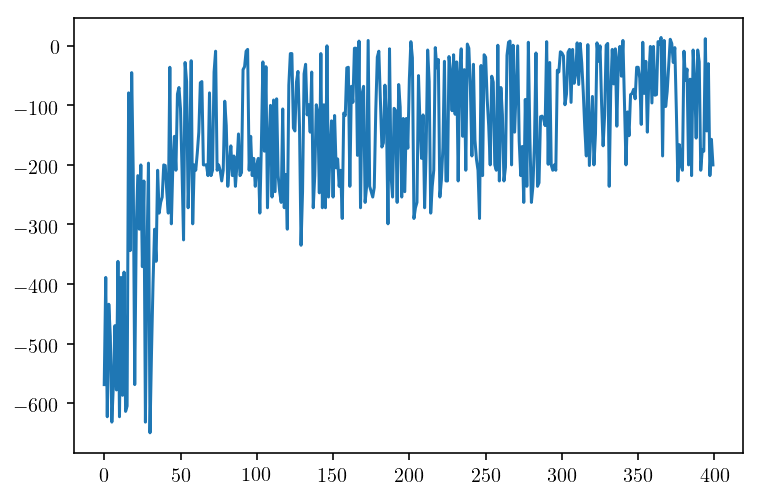

In [25]:
plt.figure()
plt.plot(returns)

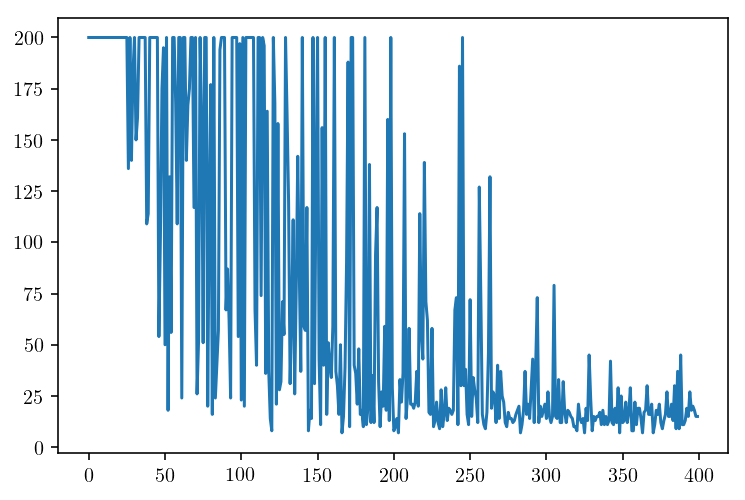

In [35]:
plt.figure()
plt.plot(steps)

In [204]:
environment.training_episode()

(10.0, 11)

### Sarsa with training routine

In [30]:
torch.nn.init.zeros_(model.weight);

In [31]:
environment.agent = agents.DQNAgent(model, optimiser, gamma=.9, temperature=1, 
                                    algorithm='sarsa', n_actions=6, use_double_learning=False)

In [317]:
returns, steps = np.array([environment.exploration_episode(training=True) for _ in range(400)]).T

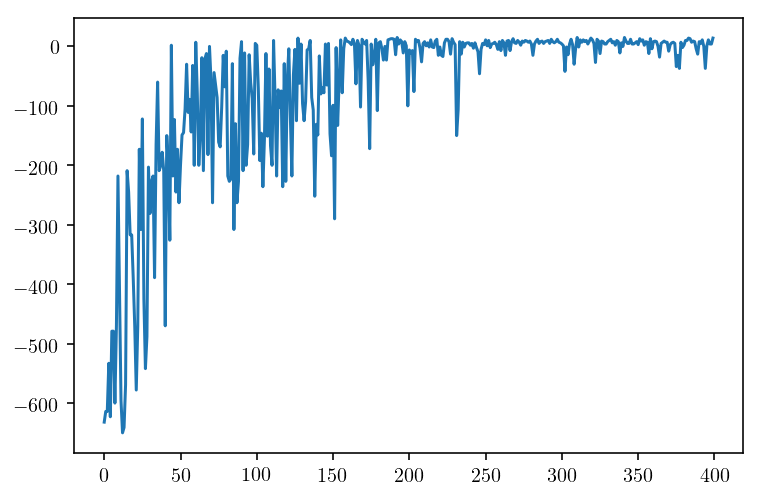

In [318]:
plt.figure()
plt.plot(returns)

It works ! in what follows, we use the `update` method from Agents.

In [325]:
environment.training_episode()

(8.0, 13)

### Expected Sarsa

In [326]:
torch.nn.init.zeros_(model.weight);

In [327]:
environment.agent = agents.DQNAgent(model, optimiser, gamma=.9, temperature=1, 
                                    algorithm='expsarsa', n_actions=6, use_double_learning=False)

In [328]:
returns, steps = np.array([environment.training_episode() for _ in range(400)]).T

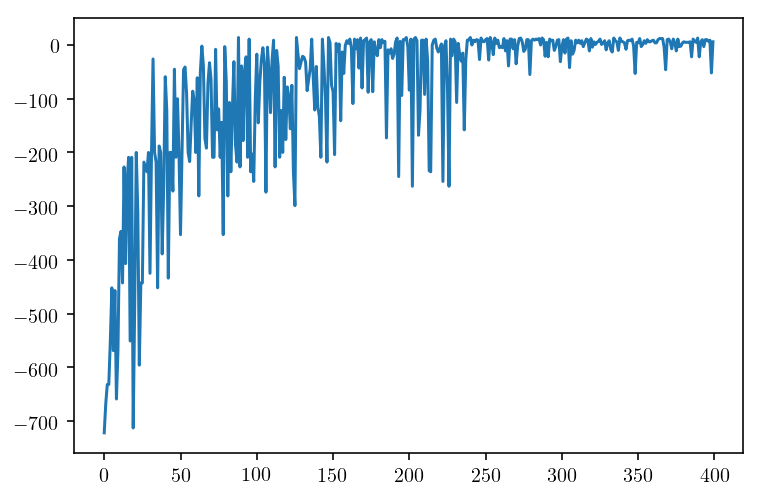

In [329]:
plt.figure()
plt.plot(returns)

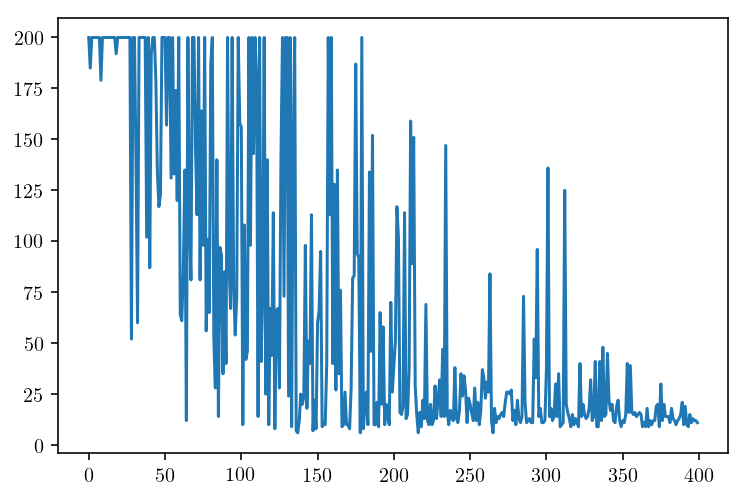

In [323]:
plt.figure()
plt.plot(steps)

In [324]:
environment.training_episode()

(-2.0, 23)

### QLearning

In [212]:
torch.nn.init.zeros_(model.weight);

In [213]:
environment.agent = agents.DQNAgent(model, optimiser, gamma=.9, temperature=1, algorithm='qlearning', n_actions=6)

In [214]:
returns, steps = np.array([environment.training_episode() for _ in range(400)]).T

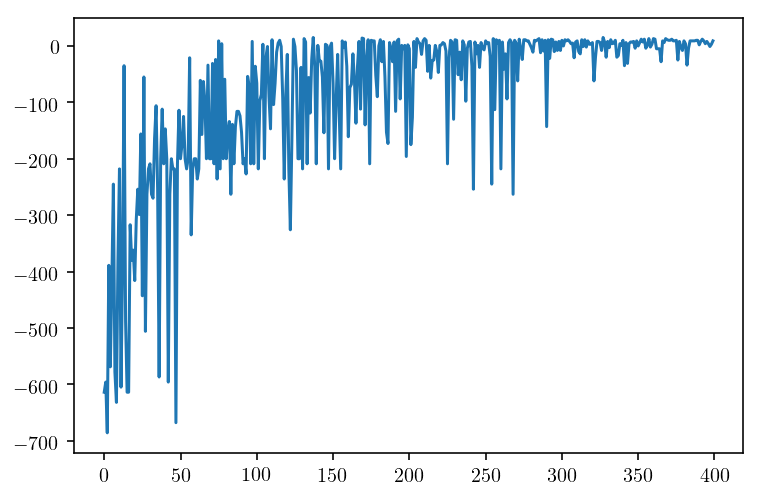

In [215]:
plt.figure()
plt.plot(returns)

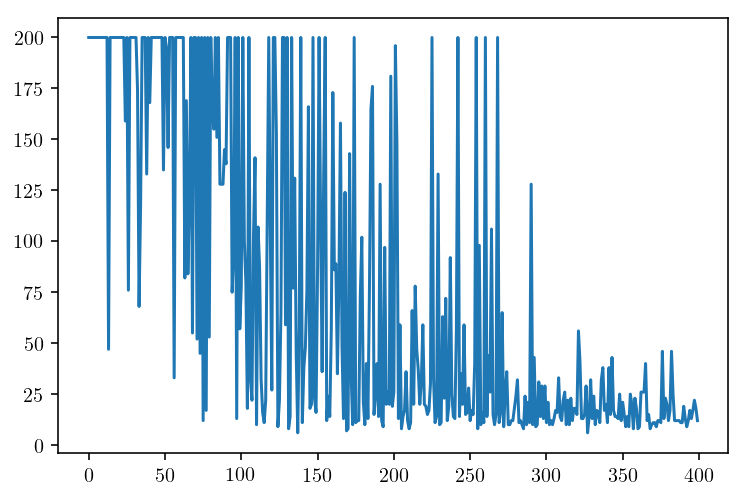

In [216]:
plt.figure()
plt.plot(steps)

In [222]:
environment.training_episode()

(2.0, 19)

## Adam

In [223]:
optimiser = torch.optim.Adam(model.parameters(), lr=.2, betas=(.9, .99))

### Sarsa

In [224]:
torch.nn.init.zeros_(model.weight);

In [225]:
environment.agent = agents.DQNAgent(model, optimiser, gamma=.9, temperature=1, algorithm='sarsa', n_actions=6)

In [226]:
returns, steps = np.array([environment.training_episode() for _ in range(400)]).T

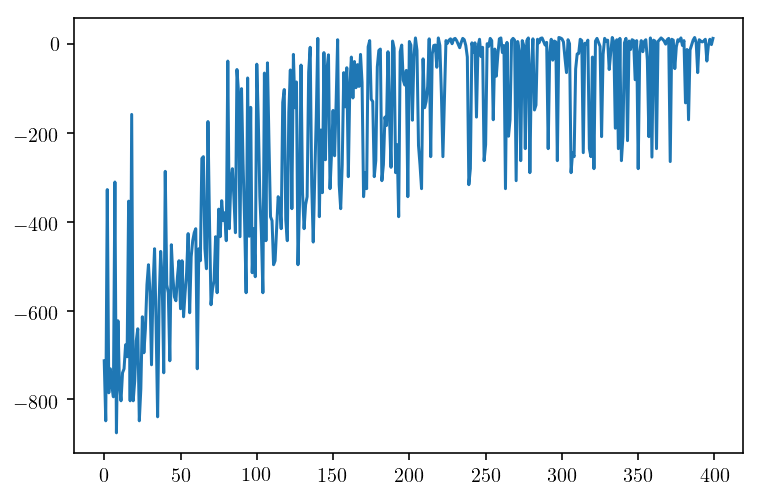

In [227]:
plt.figure()
plt.plot(returns)

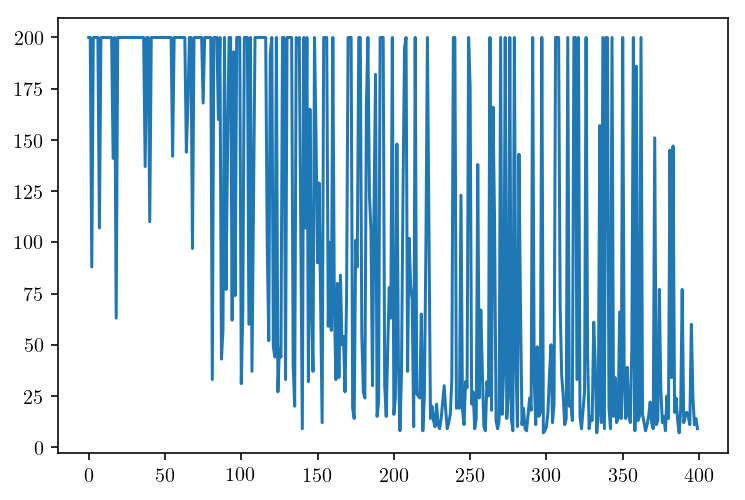

In [228]:
plt.figure()
plt.plot(steps)

In [229]:
environment.training_episode()

(10.0, 11)

### Expected Sarsa

In [230]:
torch.nn.init.zeros_(model.weight);

In [231]:
environment.agent = agents.DQNAgent(model, optimiser, gamma=.9, temperature=1, algorithm='expsarsa', n_actions=6)

In [232]:
returns, steps = np.array([environment.training_episode() for _ in range(400)]).T

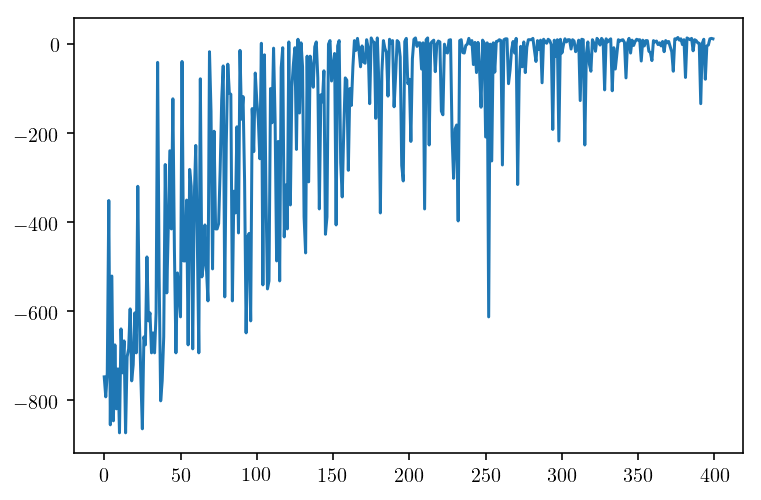

In [233]:
plt.figure()
plt.plot(returns)

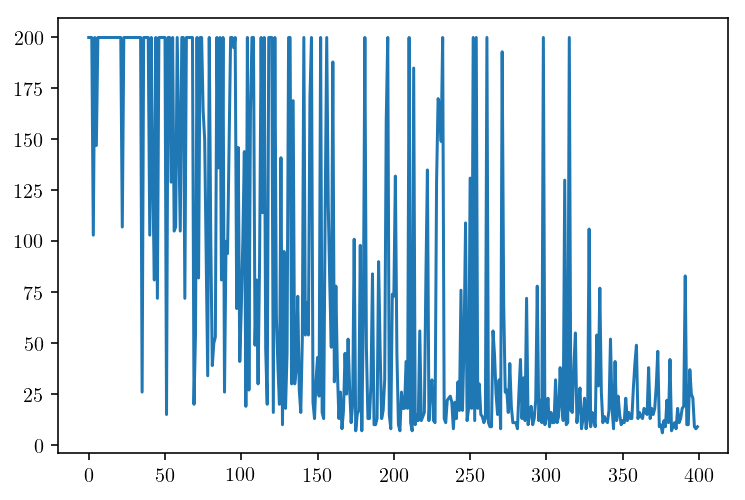

In [234]:
plt.figure()
plt.plot(steps)

In [235]:
environment.training_episode()

(1.0, 20)

### QLearning

In [236]:
torch.nn.init.zeros_(model.weight);

In [237]:
environment.agent = agents.DQNAgent(model, optimiser, gamma=.9, temperature=1, algorithm='qlearning', n_actions=6)

In [238]:
returns, steps = np.array([environment.training_episode() for _ in range(400)]).T

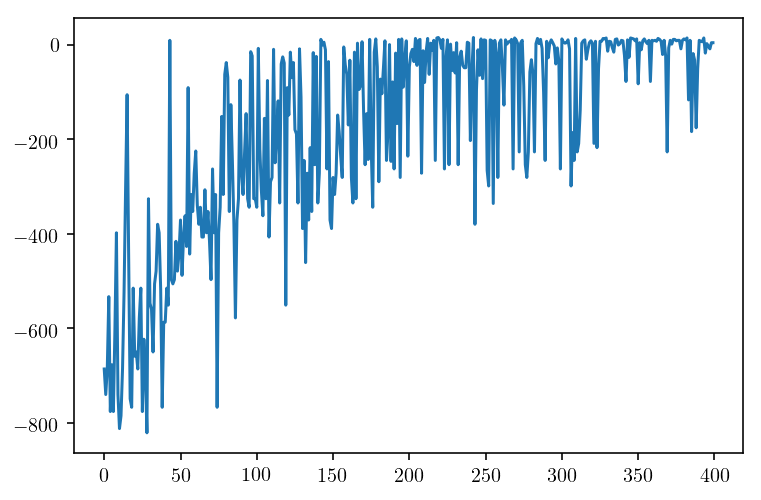

In [239]:
plt.figure()
plt.plot(returns)

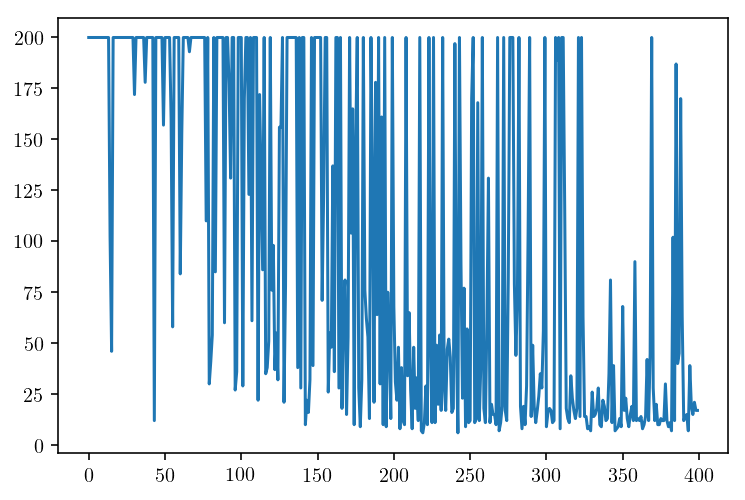

In [240]:
plt.figure()
plt.plot(steps)

In [241]:
environment.training_episode()

(-119.0, 131)

# With batch updates

In [361]:
environment = env.Environment(
    environment=gym.make('Taxi-v2'), 
    agent=agent, 
    verbose=True,
    max_steps=1000,
    capacity=10,
    representation_method='one_hot_encoding',
    use_double_learning=True,
    use_replay_memory=True
)

## SGD

In [362]:
optimiser = torch.optim.SGD(model.parameters(), lr=.45)

### Sarsa

In [375]:
torch.nn.init.zeros_(model.weight);

In [376]:
environment.agent = agents.DQNAgent(model, optimiser, gamma=.9, temperature=1, 
                                    algorithm='qlearning', n_actions=6)

In [377]:
environment.exploration_segment(10)

(-794.0, -866.0)

In [378]:
episodes = environment.replay_memory.memory[-10:]

In [379]:
states, actions, rewards, next_states, next_actions = environment.get_batch(episodes)

In [381]:
environment.agent.batch_update(states, actions, rewards, next_states, next_actions)

In [384]:
n = 200

returns = np.empty(n)

for i in range(n):
    
    environment.exploration_segment(10)
    episodes = environment.replay_memory.memory[-10:]
    states, actions, rewards, next_states, next_actions = environment.get_batch(episodes)
    environment.agent.batch_update(states, actions, rewards, next_states, next_actions)
    environment.agent.commit()
    
    returns[i] = np.array([environment.exploration_episode(training=False)[0] for _ in range(10)]).mean()

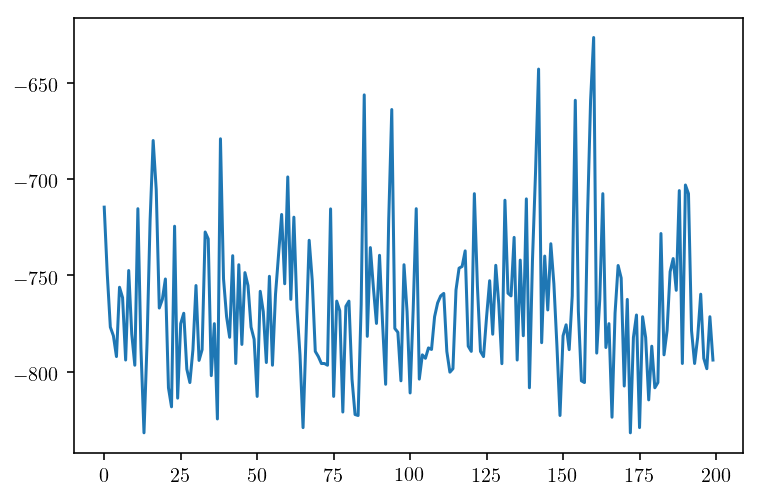

In [385]:
plt.figure()
plt.plot(returns)

## Eligibility

Next step. First, let us completely remove the bug.

In [175]:
optimiser = eligibility.EligibilitySGD(model.parameters(), lr=.45, gamma=.9, lambd=.9)

### Sarsa

In [176]:
torch.nn.init.zeros_(model.weight);

In [168]:
environment.agent = agents.DQNAgent(model, optimiser, gamma=.9, temperature=1, algorithm='sarsa', n_actions=6)

In [ ]:
returns, steps = np.array([environment.training_episode() for _ in range(400)]).T

In [ ]:
plt.figure()
plt.plot(returns)

In [ ]:
plt.figure()
plt.plot(steps)

In [ ]:
environment.training_episode()

### Expected Sarsa

In [152]:
torch.nn.init.zeros_(model.weight);

In [153]:
environment.agent = agents.DQNAgent(model, optimiser, gamma=.9, temperature=1, algorithm='expsarsa', n_actions=6)

In [154]:
returns, steps = np.array([environment.training_episode() for _ in range(400)]).T

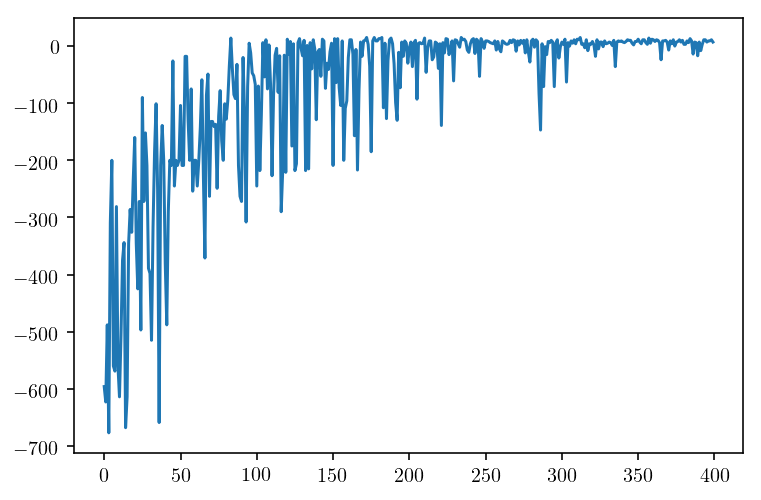

In [155]:
plt.figure()
plt.plot(returns)

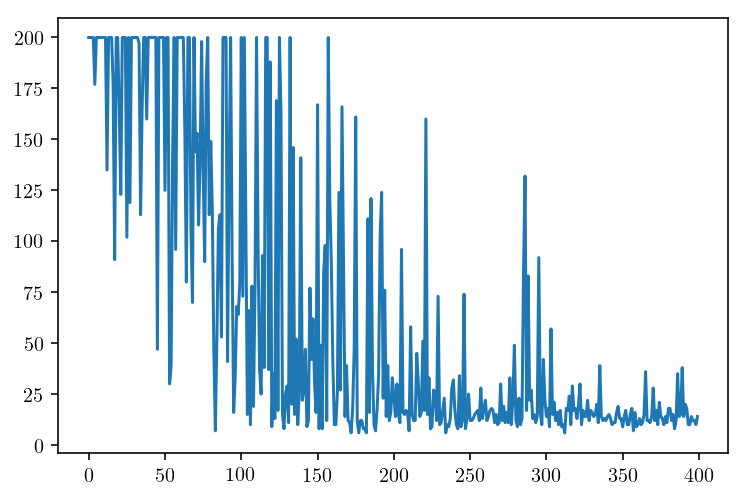

In [156]:
plt.figure()
plt.plot(steps)

In [157]:
environment.training_episode()

(8.0, 13)

### QLearning

In [158]:
torch.nn.init.zeros_(model.weight);

In [159]:
environment.agent = agents.DQNAgent(model, optimiser, gamma=.9, temperature=1, algorithm='qlearning', n_actions=6)

In [ ]:
returns, steps = np.array([environment.training_episode() for _ in range(400)]).T

In [ ]:
plt.figure()
plt.plot(returns)

In [ ]:
plt.figure()
plt.plot(steps)

In [ ]:
environment.training_episode()

# Next

In [24]:
model.weight.mean()

tensor(-0.0013, grad_fn=<MeanBackward1>)

In [30]:
returns = np.array([environment.exploration_episode(training=True) for _ in range(400)])

In [28]:
model.weight.mean()

tensor(-3.0800, grad_fn=<MeanBackward1>)

In [31]:
model.weight.mean()

tensor(-3.0643, grad_fn=<MeanBackward1>)

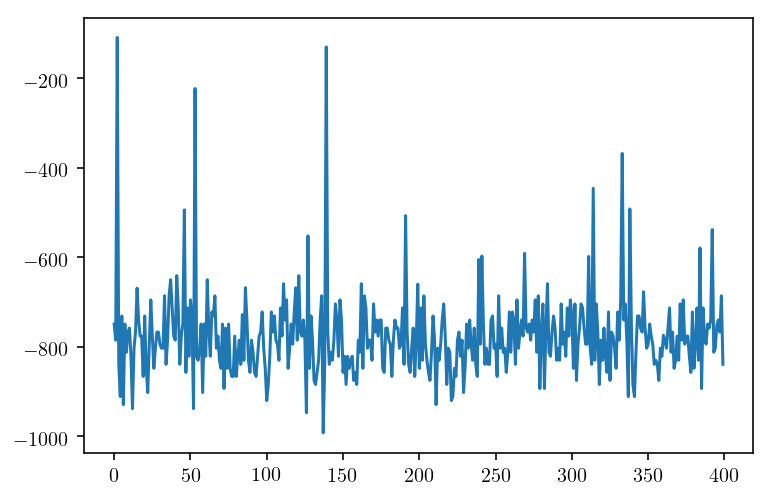

In [32]:
plt.figure()
plt.plot(returns.T[0])

In [88]:
environment.exploration_episode(render=False, return_observations=False, training=True)

(-569.0, 200)

In [60]:
environment.evaluation_episode()

(-1982.0, 200)

In [88]:
environment.exploration_episode(render=False, return_observations=False, training=True)

(-569.0, 200)

In [105]:
returns = environment.train(segments=10, episodes=10)

100%|###############################################################| 10/10 [00:17<00:00,  1.74s/it]


In [104]:
returns

array([[-565.1, -200. ],
       [-599.8, -200. ],
       [-616.7, -209. ],
       [-605.5, -209. ],
       [-613.1, -200. ],
       [-591.5, -200. ],
       [-622.1, -200. ],
       [-584.3, -200. ],
       [-589.7, -200. ],
       [-605.9, -200. ]])

In [55]:
for _ in range(5):
    
    returns = environment.train(segments=10, episodes=500)

    plt.figure()
    plt.plot(returns.T[0], label='training')
    plt.plot(returns.T[1], label='evaluation')
    plt.legend()
    plt.show()
    
    agent.temperature *= .8

  0%|                                                                        | 0/10 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
for _ in range(5):
    
    returns = environment.train(segments=10, episodes=500)

    plt.figure()
    plt.plot(returns.T[0], label='training')
    plt.plot(returns.T[1], label='evaluation')
    plt.legend()
    plt.show()
    
    agent.temperature *= .8

In [ ]:
for _ in range(5):
    
    returns = environment.train(segments=10, episodes=500)

    plt.figure()
    plt.plot(returns.T[0], label='training')
    plt.plot(returns.T[1], label='evaluation')
    plt.legend()
    plt.show()
    
    agent.temperature *= .9

In [ ]:
environment.environment.render()
environment.reset()

In [ ]:
environment.environment.render()
environment.environment.step(2)

In [ ]:
environment.environment.render()
environment.evaluation_episode()

In [ ]:
environment.evaluation_episode(render=True)

In [ ]:
agent.temperature

In [ ]:
environment.exploration_segment(20)

In [ ]:
environment.batch(100)

In [ ]:
environment.reset()
s = environment.state

In [ ]:
agent.q(s)

In [ ]:
agent.commit()

In [ ]:
agent.q(x)

In [ ]:
environment.evaluation_episode()

In [ ]:
state = environment.environment.reset()

agent.eval()

done = False
full_return = 0.

action = np.random.choice(environment.greedy(state))

counter = 0
while not done and counter < 10000:
    
    s, reward, done, i = environment.environment.step(action)

    # If there are ties, we might want to choose between actions at random
    a = np.random.choice(environment.greedy(s))

    # We store the new state and action
    state, action = s, a
    
    full_return = agent.gamma * full_return + reward
    counter += 1

full_return, counter

In [ ]:
state = environment.environment.reset()
action = np.random.choice(environment.greedy(state))

In [ ]:
s, reward, done, i = environment.environment.step(action)

# If there are ties, we might want to choose between actions at random
# a = np.random.choice(4, p=environment.epsilon_greedy(s, .1))
a = environment.environment.action_space.sample()

# We store the new state and action
state, action = s, a

done = done or i['ale.lives'] < 5

done, i, a

# Training

In [ ]:
environment.run(epochs=2, segments=5, episodes=50)

In [ ]:
environment.save('../saved/')